## Generación de semilla

In [3]:
# Función para generar la semilla del laboratorio
def generar_numero_semilla(dni):
    """
    Genera un número semilla de 8 dígitos basado en el número de identidad (DNI).

    Args:
        dni (str): DNI completo, incluyendo la letra al final.

    Returns:
        int: Número semilla compuesto por 8 dígitos como un entero.
    """
    # Definir el mapeo para convertir la letra final a su correspondiente número según la tabla
    letra_a_numero = {
        'T': 0, 'R': 1, 'W': 2, 'A': 3, 'G': 4, 'M': 5, 'Y': 6, 'F': 7,
        'P': 8, 'D': 9, 'X': 10, 'B': 11, 'N': 12, 'J': 13, 'Z': 14, 'S': 15,
        'Q': 16, 'V': 17, 'H': 18, 'L': 19, 'C': 20, 'K': 21, 'E': 22
    }

    # Extraer la parte numérica del DNI
    dni_numerico = ''.join(filter(str.isdigit, dni))

    # Añadir el número correspondiente a la letra final
    letra_final = dni[-1].upper()
    if letra_final in letra_a_numero:
        dni_numerico += str(letra_a_numero[letra_final])

    # Asegurarse de que el DNI tiene al menos 8 dígitos
    while len(dni_numerico) < 8:
        dni_numerico += dni_numerico[:8 - len(dni_numerico)]

    # Obtener los primeros 8 dígitos desde la derecha
    numero_semilla = dni_numerico[-8:]

    # Sustituir dígitos menores que 2 por el número 2
    numero_semilla = ''.join([str(max(int(c), 2)) for c in numero_semilla])

    return int(numero_semilla)
    
dni = "48506658A";
id_lab = generar_numero_semilla(dni);
id_lab = 17;

## Descripción del conjunto de datos
 Descripción del conjunto de datos, aplicando los métodos info, describe, head, tail.

In [19]:
import pandas as pd
import numpy as np

# Cargar el archivo Excel
file_path = "ingmaco04_act3_drugs.xlsx"  # El archivo está en el mismo directorio
xls = pd.ExcelFile(file_path)

# Mostrar las hojas disponibles en el archivo
print(xls.sheet_names)

# Cargar la hoja de datos en un DataFrame
df = pd.read_excel(xls, sheet_name='drug200_1')

# Descripción de los datos
print(df.info(), "\n")
print(df.describe(), "\n")
print(df.head(), "\n")
print(df.tail(), "\n")


['drug200_1']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None 

              Age       Na_to_K
count  200.000000    200.000000
mean    44.315000  14901.706900
std     16.544315   8322.843139
min     15.000000      7.340000
25%     31.000000  10053.000000
50%     45.000000  13110.000000
75%     58.000000  19204.500000
max     74.000000  38247.000000 

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH  25355.0  drugY
1   47   M     LOW        HIGH  13093.0  drugC
2   47   M     LOW        HIGH  10114.0  drugC

Se aplica un análisis gráfico de todas las variables (predictoras y respuesta)

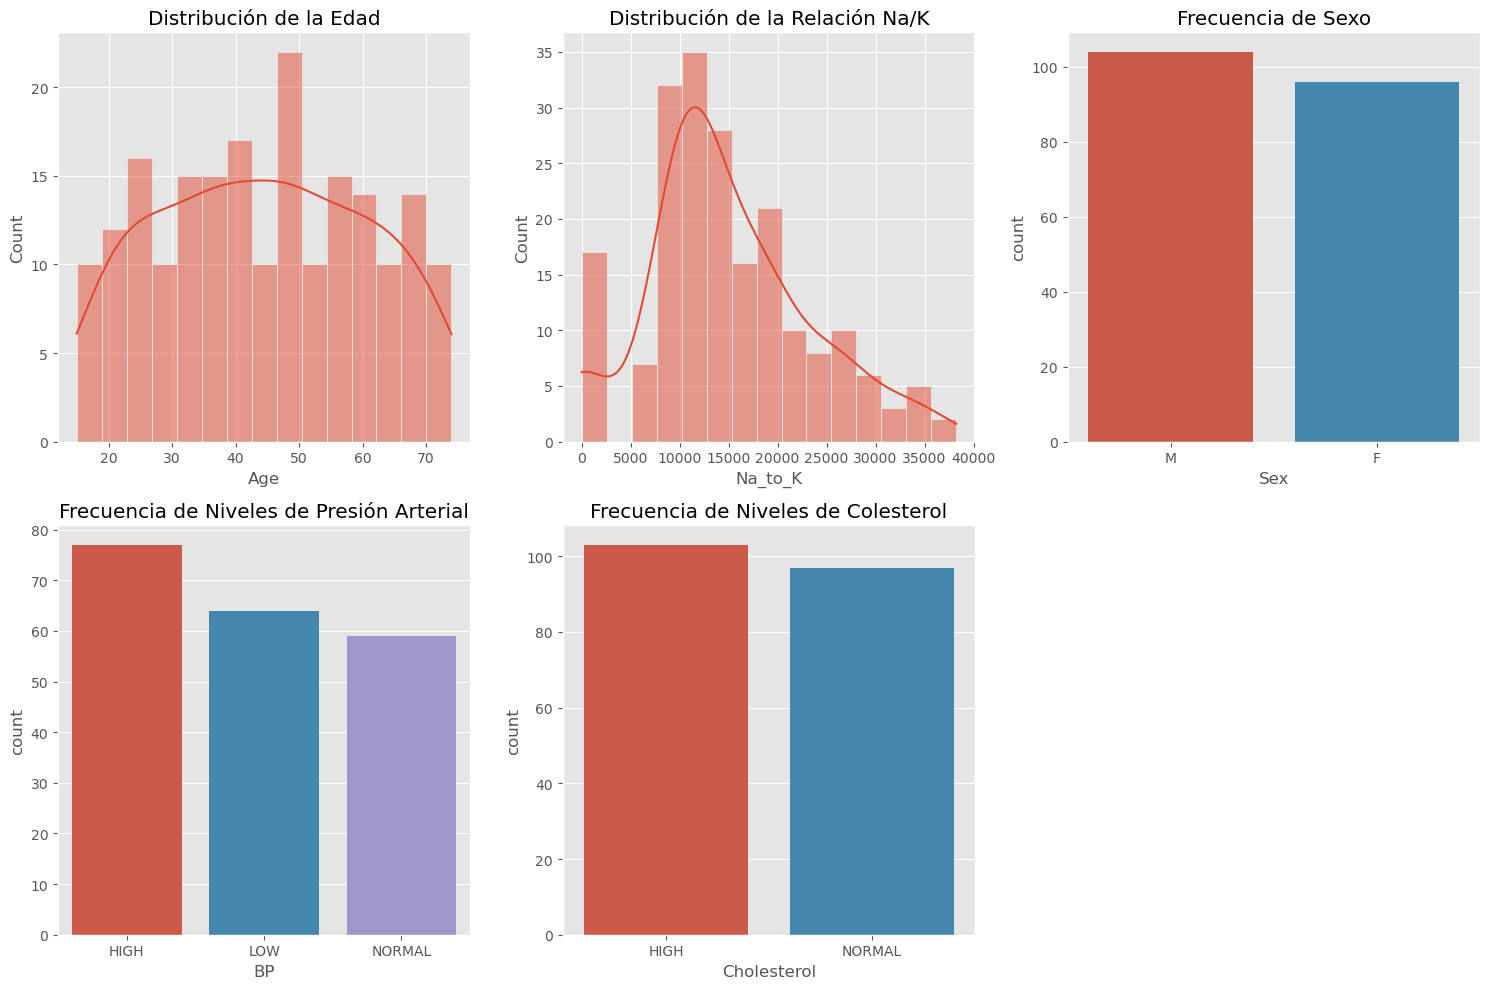

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

# Configurar estilo de los gráficos
plt.style.use("ggplot")

# Crear figura con múltiples subgráficos incluyendo la variable "Sex"
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Histograma de la Edad
sns.histplot(df["Age"], bins=15, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribución de la Edad")

# Histograma de la relación Na/K
sns.histplot(df["Na_to_K"], bins=15, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribución de la Relación Na/K")

# Gráfico de barras de la variable BP
sns.countplot(x="BP", data=df, ax=axes[1, 0], order=df["BP"].value_counts().index)
axes[1, 0].set_title("Frecuencia de Niveles de Presión Arterial")

# Gráfico de barras de la variable Cholesterol
sns.countplot(x="Cholesterol", data=df, ax=axes[1, 1], order=df["Cholesterol"].value_counts().index)
axes[1, 1].set_title("Frecuencia de Niveles de Colesterol")

# Gráfico de barras de la variable Sex
sns.countplot(x="Sex", data=df, ax=axes[0, 2], order=df["Sex"].value_counts().index)
axes[0, 2].set_title("Frecuencia de Sexo")

# Ocultar el subplot vacío (espacio sobrante en la cuadrícula)
fig.delaxes(axes[1, 2])

# Ajustar diseño
plt.tight_layout()
plt.show()


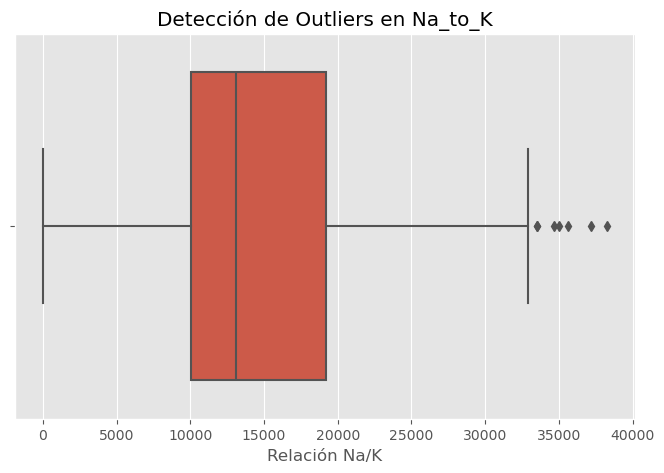

In [23]:
# Gráfico de caja (Boxplot) para analizar los outliers en Na_to_K
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Na_to_K"])
plt.title("Detección de Outliers en Na_to_K")
plt.xlabel("Relación Na/K")
plt.show()


Se necesita convertir las variables categóricas en un formato que pueda ser interpretado por los algoritmos de machine learning, como son los árboles de decisión. Vamos a usar el método:

- Codificación con Label Encoding (Codificación de etiquetas)
Se asigna un número entero a cada categoría.
Es útil cuando hay un orden natural en las categorías.
No recomendable si las categorías no tienen un orden jerárquico, aunque para árboles da igual ¿?

In [25]:
from sklearn.preprocessing import LabelEncoder
'''
# Crear el codificador
le = LabelEncoder()

# Aplicar Label Encoding a las columnas categóricas
for col in ["Sex", "BP", "Cholesterol", "Drug"]:  # Drug si también la necesitas como variable de salida
    df[col] = le.fit_transform(df[col])

# Mostrar el DataFrame transformado
df.info()
df.head()
'''

# Diccionario para almacenar los mapeos de categorías
encoding_map = {}

# Aplicar LabelEncoder a cada variable categórica y almacenar los mapeos
categorical_features = ["Sex", "BP", "Cholesterol", "Drug"]

le = LabelEncoder()
df_le = df.copy()

for col in categorical_features:
    df_le[col] = le.fit_transform(df[col])  # Si ya aplicaste LabelEncoder, omite esta línea
    encoding_map[col] = dict(zip(le.classes_, le.transform(le.classes_)))  # Guardar mapeo

# Mostrar el mapeo de cada variable categórica
for feature, mapping in encoding_map.items():
    print(f"Codificación de {feature}: {mapping}")

df_le.info()
df_le.head()

Codificación de Sex: {'F': 0, 'M': 1}
Codificación de BP: {'HIGH': 0, 'LOW': 1, 'NORMAL': 2}
Codificación de Cholesterol: {'HIGH': 0, 'NORMAL': 1}
Codificación de Drug: {'drugA': 0, 'drugB': 1, 'drugC': 2, 'drugX': 3, 'drugY': 4}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int32  
 2   BP           200 non-null    int32  
 3   Cholesterol  200 non-null    int32  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int32  
dtypes: float64(1), int32(4), int64(1)
memory usage: 6.4 KB


Age  Sex  BP  Cholesterol  Na_to_K  Drug
0   23    0   0            0  25355.0     4
1   47    1   1            0  13093.0     2
2   47    1   1            0  10114.0     2
3   28    0   2            0   7798.0     3
4   61    0   1            0  18043.0     4

## Divisón del conjunto de datos. 75% para observaciones y el resto para validar en los distintos métodos.

In [35]:
from sklearn.model_selection import train_test_split

# Definir X como las variables predictoras (todas excepto "Drug")
X = df_le.drop(columns=["Drug"])

# Definir y como la variable objetivo ("Drug")
y = df_le["Drug"]

# Separar en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=id_lab, stratify=y)

# Verificar tamaños de los conjuntos
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")

Tamaño de X_train: (150, 5)
Tamaño de X_test: (50, 5)
Tamaño de y_train: (150,)
Tamaño de y_test: (50,)


Divido las variables predictoras (X) de la variable respuesta (y)

## Se entrena el árbol con los datos por defecto

In [42]:
from sklearn.tree import DecisionTreeClassifier

# crear el objeto de clase arbol---------------------------------
tree_clf_default = DecisionTreeClassifier(random_state = id_lab)

# ajustar el arbol-----------------------------------------------
tree_clf_default.fit(X_train, y_train);

Se guarda la figura del árbol

In [44]:
#from graphviz import Source
import os  # No está en el pdf
from sklearn.tree import export_graphviz

# definir donde vamos a guardar la figura------------------------
ROOT_DIR = "."
PATH_FIGURAS = os.path.join(ROOT_DIR, "images")
os.makedirs(PATH_FIGURAS, exist_ok = True)

export_graphviz(
tree_clf_default,
out_file = os.path.join(PATH_FIGURAS, "tree_clf_default.dot"),
feature_names = X_train.columns.tolist(),
class_names = le.inverse_transform(y_train.unique()).tolist(),
rounded = True,
filled = True
)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'images/tree_clf_default.dot', '-o', 'images/tree_clf_default.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'images/tree_clf_default.png')


Se hace una predicción de la respuesta y se mide la precisión.

In [54]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#Predict the response for test dataset
y_train_pred_default = tree_clf_default.predict(X_train)
y_pred_default = tree_clf_default.predict(X_test)

# Calcular la exactitud (accuracy)
accuracy_train_default = metrics.accuracy_score(y_train, y_train_pred_default)
accuracy_test_default = metrics.accuracy_score(y_test, y_pred_default)

print("Exactitud en Entrenamiento:", accuracy_train_default)
print("Exactitud en Pruebas:", accuracy_test_default)

Exactitud en Entrenamiento: 1.0
Exactitud en Pruebas: 0.94


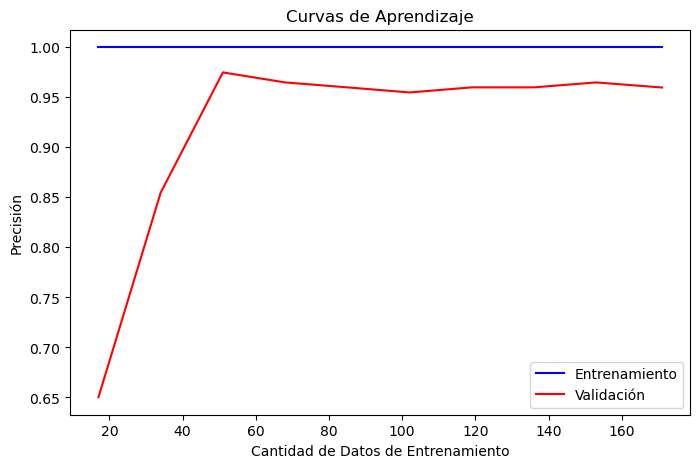

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Calcular curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    tree_clf_default, X, y, cv = 7, scoring = "accuracy", train_sizes = np.linspace(0.1, 1.0, 10)
)

# Promedio y desviación estándar de las puntuaciones
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Graficar curvas de aprendizaje
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Entrenamiento", color="blue")
plt.plot(train_sizes, test_mean, label="Validación", color="red")
plt.xlabel("Cantidad de Datos de Entrenamiento")
plt.ylabel("Precisión")
plt.title("Curvas de Aprendizaje")
plt.legend()
plt.show()


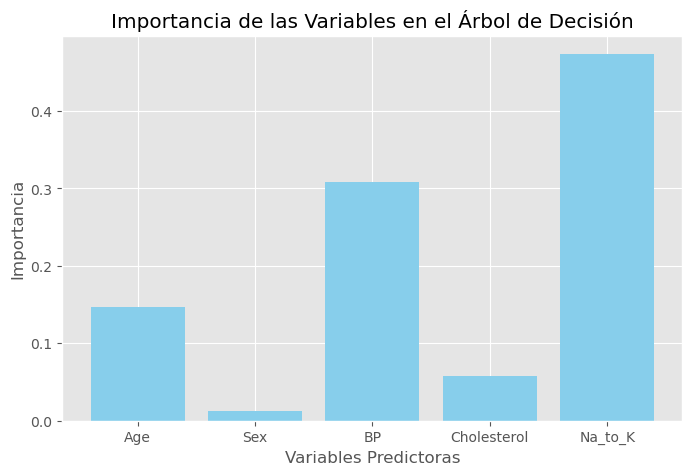

In [48]:
import matplotlib.pyplot as plt

# Obtener la importancia de las variables
importances = tree_clf_default.feature_importances_

# Graficar la importancia de cada variable
plt.figure(figsize=(8, 5))
plt.bar(X_train.columns, importances, color='skyblue')
plt.xlabel("Variables Predictoras")
plt.ylabel("Importancia")
plt.title("Importancia de las Variables en el Árbol de Decisión")
plt.show()

## Se entrea el árbol con profundidad 3
Ahora ponemos la restricción de que la profundidad tenga 3 niveles.

In [50]:
# crear el objeto de clase arbol---------------------------------
tree_clf_depth3 = DecisionTreeClassifier(max_depth = 3, random_state = id_lab)

# ajustar el arbol-----------------------------------------------
tree_clf_depth3.fit(X_train, y_train);

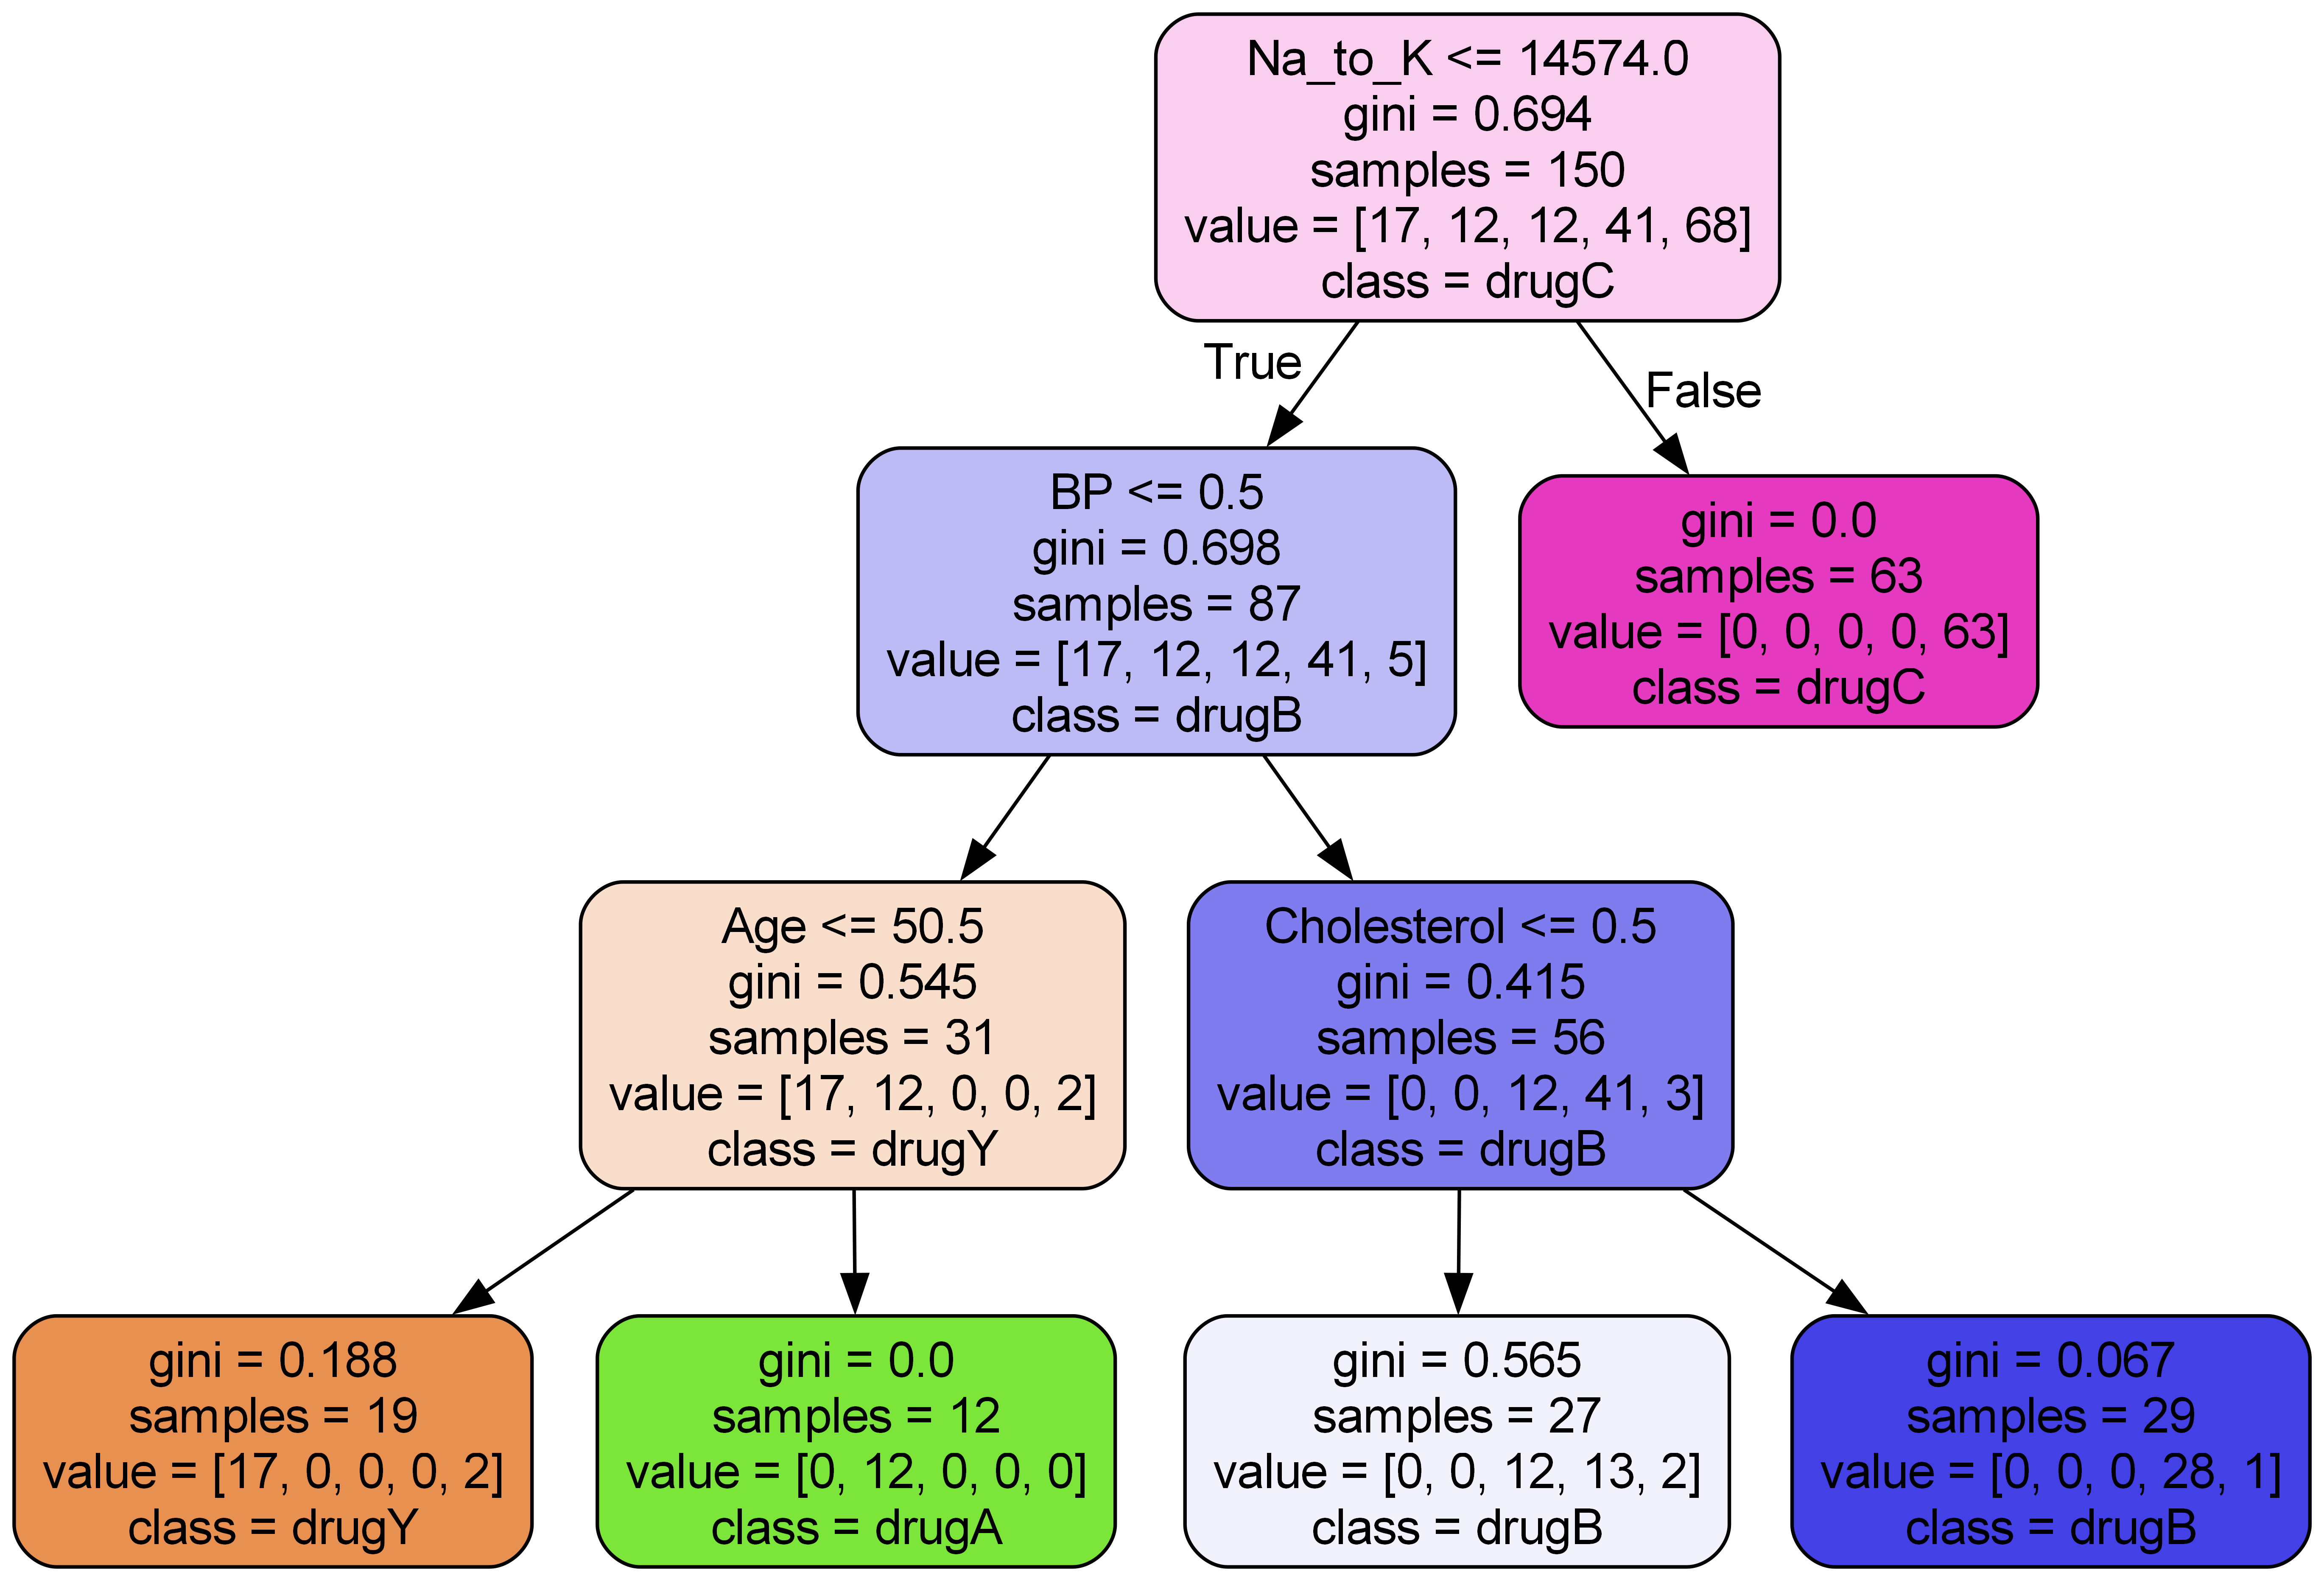

In [52]:
export_graphviz(
    tree_clf_depth3,
    out_file = os.path.join(PATH_FIGURAS, "tree_clf_depth3.dot"),
    feature_names = X_train.columns.tolist(),
    class_names = le.inverse_transform(y_train.unique()).tolist(),
    rounded = True,
    filled = True
)

# Convert to png using system command (requires Graphviz)
call(['dot', '-Tpng', 'images/tree_clf_depth3.dot', '-o', 'images/tree_clf_depth3.png', '-Gdpi=600'])

# Display in jupyter notebook
Image(filename = 'images/tree_clf_depth3.png')

La rama con BP <= 1.5 mantiene la misma clase (drugY) porque la división no logra separar significativamente las muestras en clases distintas.

In [60]:
#Predict the response for test dataset
y_train_pred_depth3 = tree_clf_depth3.predict(X_train)
y_pred_depth3 = tree_clf_depth3.predict(X_test)

# Calcular la exactitud (accuracy)
accuracy_train_depth3 = metrics.accuracy_score(y_train, y_train_pred_depth3)
accuracy_test_depth3 = metrics.accuracy_score(y_test, y_pred_depth3)

print("Exactitud en Entrenamiento:", accuracy_train_depth3)
print("Exactitud en Pruebas:", accuracy_test_depth3)

Exactitud en Entrenamiento: 0.8866666666666667
Exactitud en Pruebas: 0.88


Ahora la precisión baja. Como decía, incluso hay una clase que no se predice nunca.

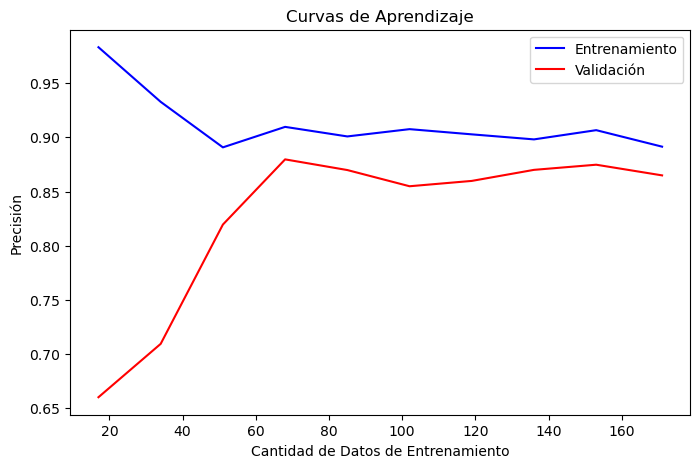

In [46]:
# Calcular curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    tree_clf_depth3, X, y, cv = 7, scoring = "accuracy", train_sizes = np.linspace(0.1, 1.0, 10)
)

# Promedio y desviación estándar de las puntuaciones
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Graficar curvas de aprendizaje
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Entrenamiento", color="blue")
plt.plot(train_sizes, test_mean, label="Validación", color="red")
plt.xlabel("Cantidad de Datos de Entrenamiento")
plt.ylabel("Precisión")
plt.title("Curvas de Aprendizaje")
plt.legend()
plt.show()

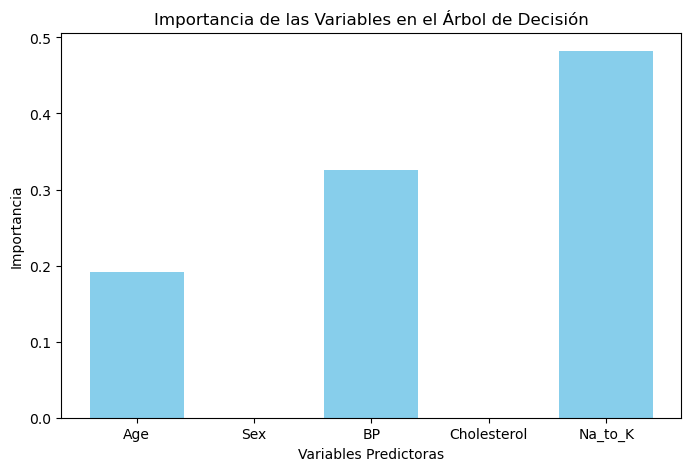

In [86]:
# Obtener la importancia de las variables
importances = tree_clf_depth3.feature_importances_

# Graficar la importancia de cada variable
plt.figure(figsize=(8, 5))
plt.bar(X_train.columns, importances, color='skyblue')
plt.xlabel("Variables Predictoras")
plt.ylabel("Importancia")
plt.title("Importancia de las Variables en el Árbol de Decisión")
plt.show()

## Se entrena el árbol con mínimo número de observaciones = 5

In [88]:
# crear el objeto de clase arbol---------------------------------
tree_clf_samples_split5 = DecisionTreeClassifier(min_samples_split = 5, random_state = id_lab)

# ajustar el arbol-----------------------------------------------
tree_clf_samples_split5.fit(X_train, y_train);

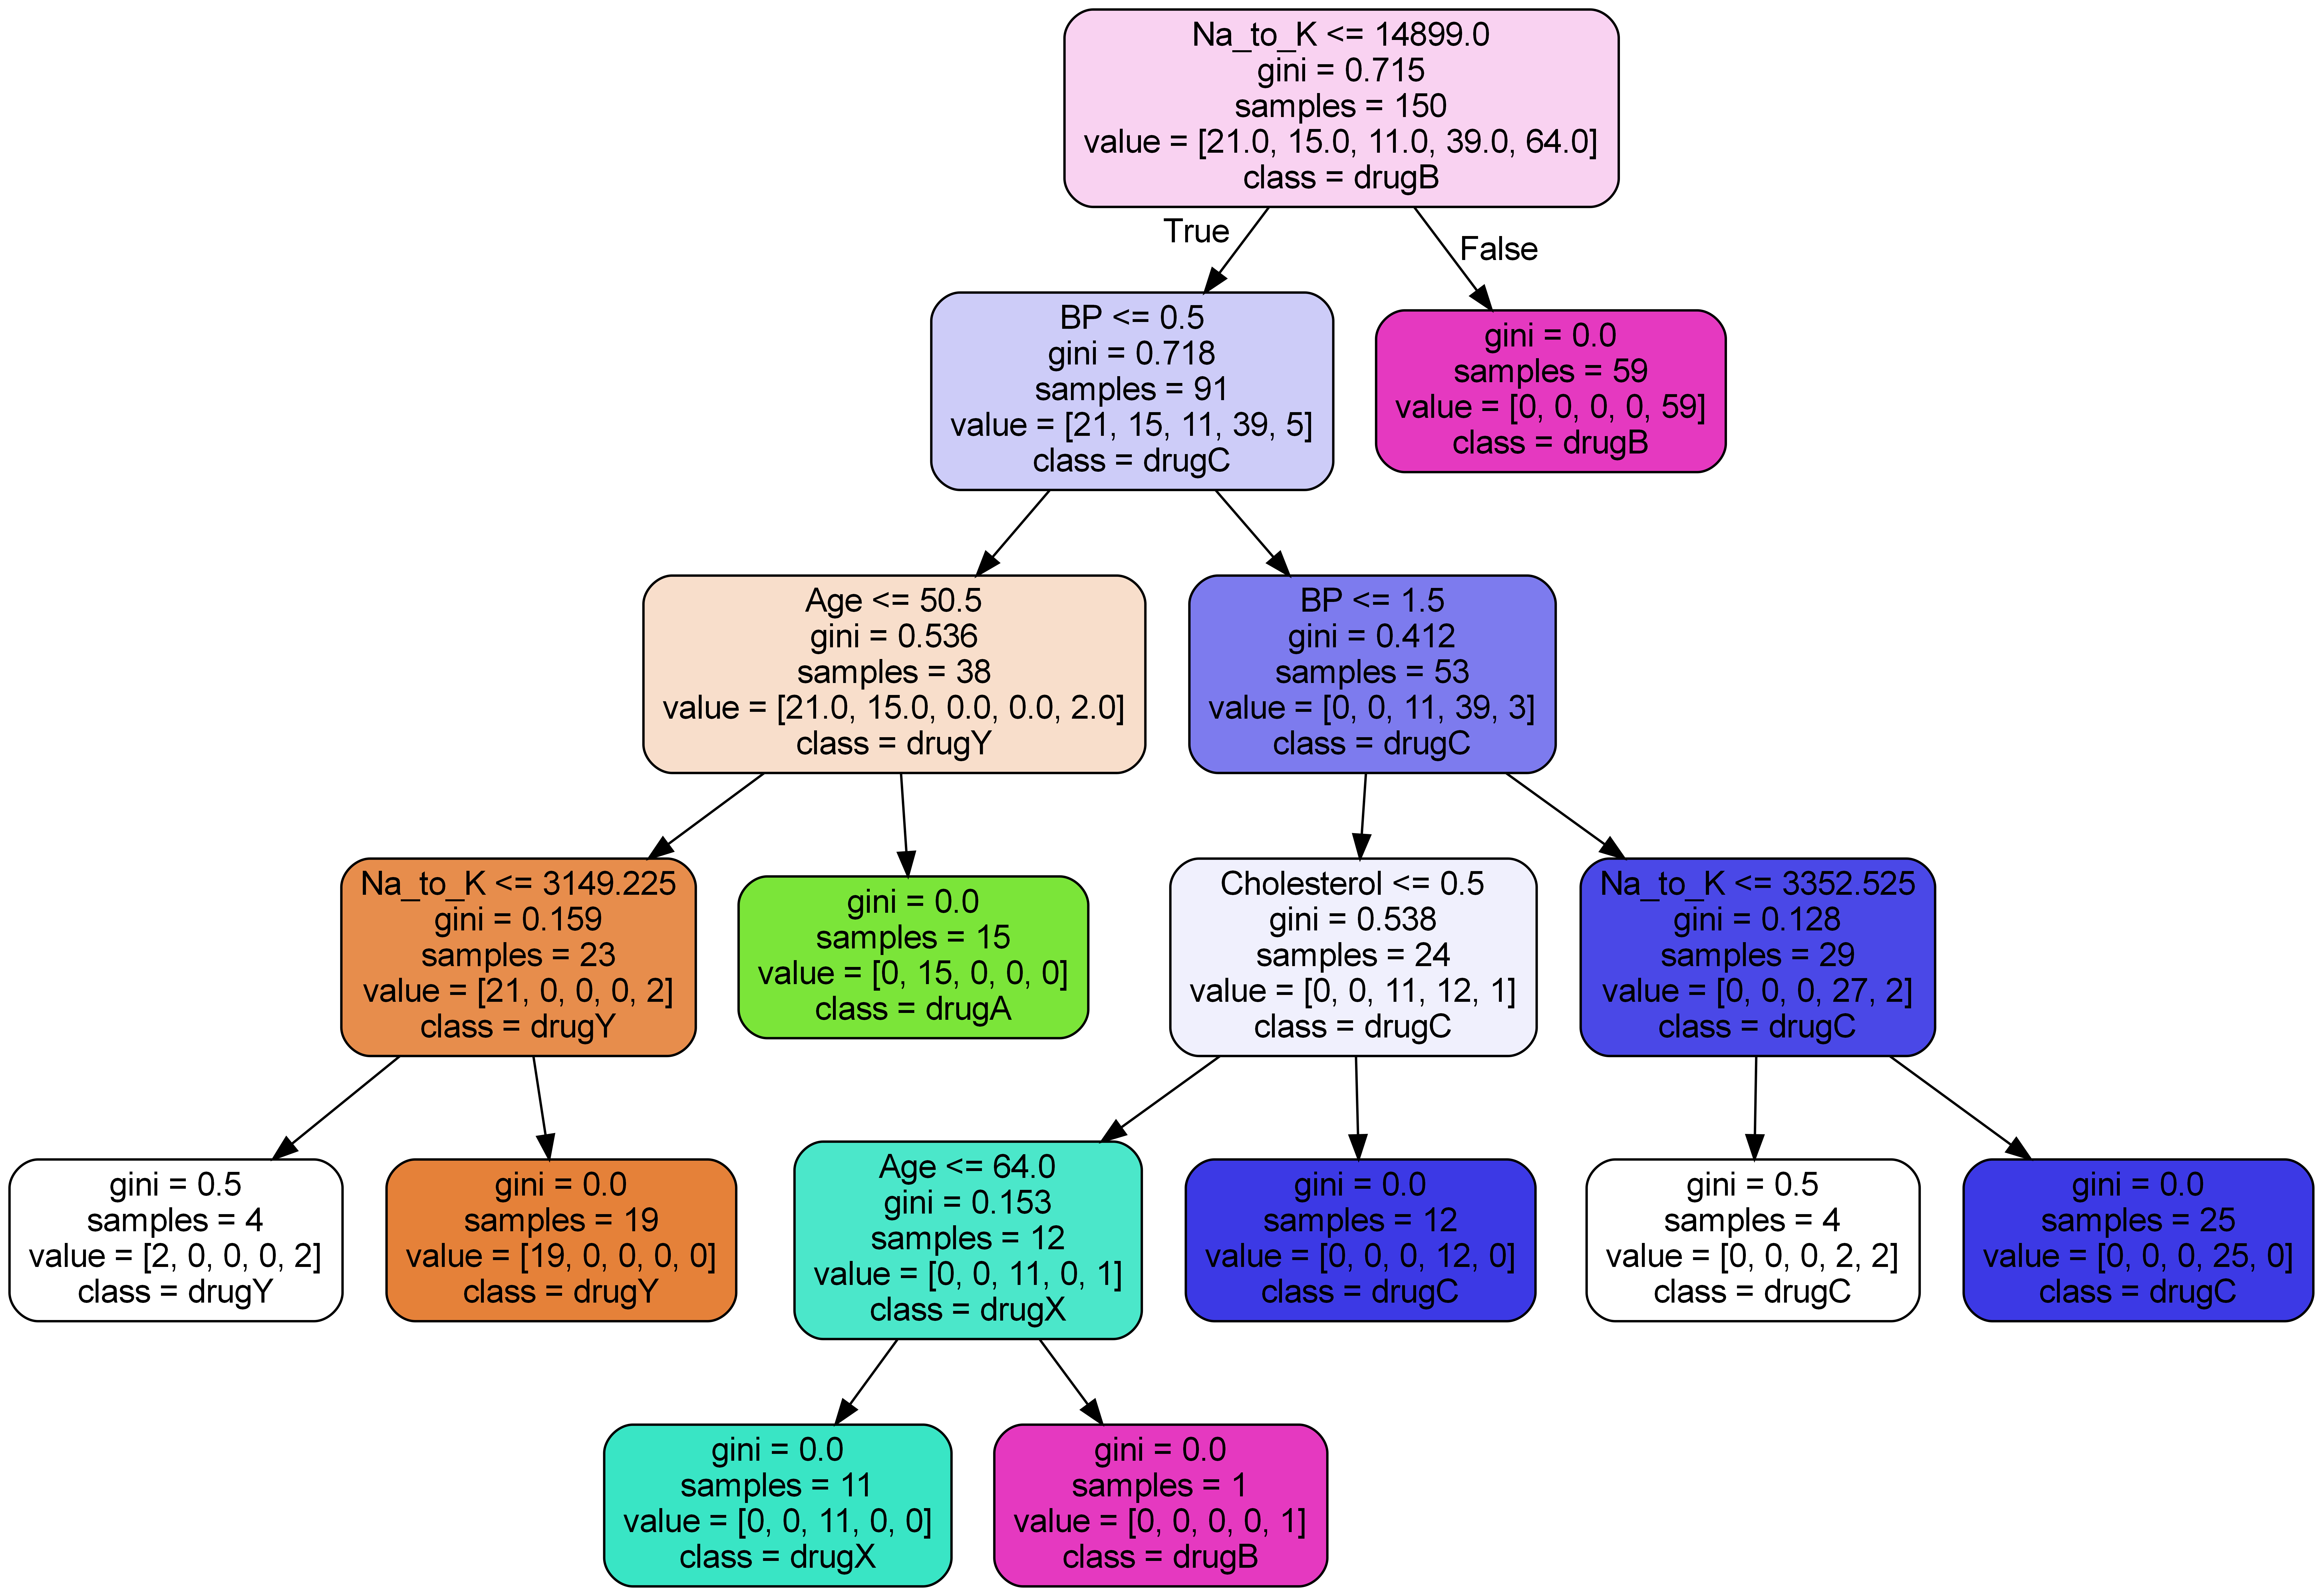

In [90]:
export_graphviz(
    tree_clf_samples_split5,
    out_file = os.path.join(PATH_FIGURAS, "tree_clf_samples_split5.dot"),
    feature_names = X_train.columns.tolist(),
    class_names = le.inverse_transform(y_train.unique()).tolist(),
    rounded = True,
    filled = True
)

# Convert to png using system command (requires Graphviz)
call(['dot', '-Tpng', 'images/tree_clf_samples_split5.dot', '-o', 'images/tree_clf_samples_split5.png', '-Gdpi=600'])

# Display in jupyter notebook
Image(filename = 'images/tree_clf_samples_split5.png')

In [92]:
#Predict the response for test dataset
y_train_pred_split5 = tree_clf_samples_split5.predict(X_train)
y_pred_split5 = tree_clf_samples_split5.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Exactitud/accuracy en Entrenamiento:", metrics.accuracy_score(y_train, y_train_pred_split5))
print("Exactitud/accuracy en Pruebas:", metrics.accuracy_score(y_test, y_pred_split5))

Exactitud/accuracy en Entrenamiento: 0.9733333333333334
Exactitud/accuracy en Pruebas: 0.94


Sigue faltando una clase. Ahora la precisión en cualquier caso, sube.

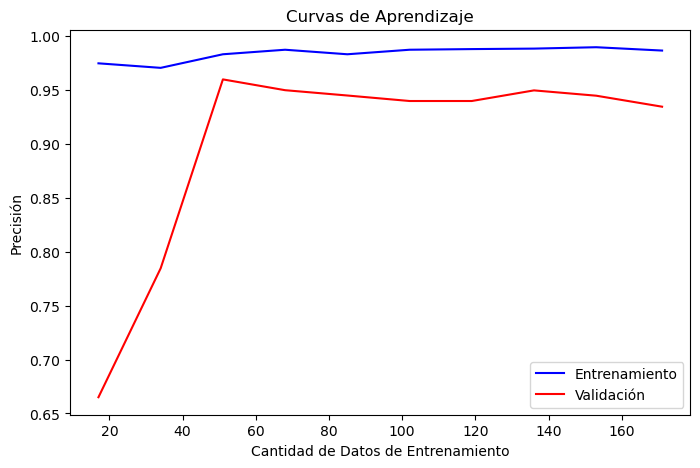

In [94]:
# Calcular curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    tree_clf_samples_split5, X, y, cv = 7, scoring = "accuracy", train_sizes = np.linspace(0.1, 1.0, 10)
)

# Promedio y desviación estándar de las puntuaciones
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Graficar curvas de aprendizaje
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Entrenamiento", color="blue")
plt.plot(train_sizes, test_mean, label="Validación", color="red")
plt.xlabel("Cantidad de Datos de Entrenamiento")
plt.ylabel("Precisión")
plt.title("Curvas de Aprendizaje")
plt.legend()
plt.show()

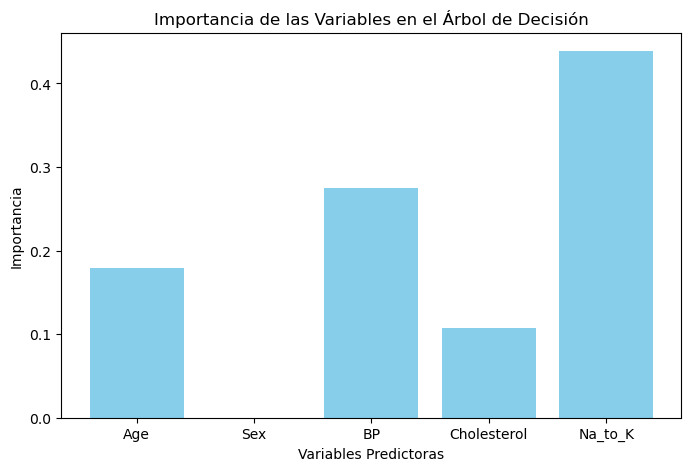

In [96]:
# Obtener la importancia de las variables
importances = tree_clf_samples_split5.feature_importances_

# Graficar la importancia de cada variable
plt.figure(figsize=(8, 5))
plt.bar(X_train.columns, importances, color='skyblue')
plt.xlabel("Variables Predictoras")
plt.ylabel("Importancia")
plt.title("Importancia de las Variables en el Árbol de Decisión")
plt.show()

## Árbol con reemplazamiento (bagging)

In [98]:
# cargar librerías
from sklearn.ensemble import BaggingClassifier

# crear objeto de la clase BaggingClassifier
tree_clf_bagging = BaggingClassifier(
    estimator = DecisionTreeClassifier(random_state = id_lab),  # Modelo base (árbol de decisión)
    n_estimators = 10,          # Número de árboles en el ensamble
    #max_samples = 75, 
    bootstrap  = True,          # Muestreo con reemplazo (Bagging)
    n_jobs=-1,                  # Paralelización en todos los núcleos disponibles
    random_state = id_lab);

# ajustar el modelo
tree_clf_bagging.fit(X_train, y_train);

In [100]:
# obtener estimaciones del modelo sobre la muestra de test
y_train_bagging = tree_clf_bagging.predict(X_train)
y_pred_bagging = tree_clf_bagging.predict(X_test)

#Predict the response for test dataset
print("Exactitud/accuracy en Entrenamiento:", metrics.accuracy_score(y_train, y_train_bagging))
print("Exactitud/accuracy en Prueba:", metrics.accuracy_score(y_test, y_pred_bagging))

Exactitud/accuracy en Entrenamiento: 1.0
Exactitud/accuracy en Prueba: 0.98


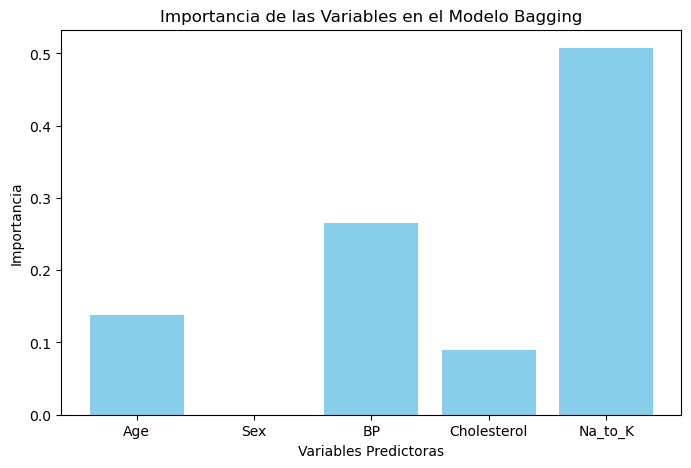

In [122]:
#import matplotlib.pyplot as plt
#import numpy as np

# Obtener importancia de las variables
importances = np.mean([
    tree.feature_importances_ for tree in tree_clf_bagging.estimators_
], axis=0)

# Graficar la importancia de cada variable
plt.figure(figsize=(8, 5))
plt.bar(X_train.columns, importances, color='skyblue')
plt.xlabel("Variables Predictoras")
plt.ylabel("Importancia")
plt.title("Importancia de las Variables en el Modelo Bagging")
plt.show()


Usar ensambles como Bagging reducen la varianza